In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import MinMaxScaler

# Load Data

In [2]:
df_train = pd.read_csv('C:/Users/DEVU/Downloads/Arya_DataScientist_Assignment/Data/training_set.csv')
df_test = pd.read_csv('C:/Users/DEVU/Downloads/Arya_DataScientist_Assignment/Data/test_set.csv')

In [3]:
df_train.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


# EDA

In [4]:
lst=[]
for i in range(1,58):
    lst.append(i)
    i=i+1
lst1= [str(int) for int in lst]
lst1

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57']

C:\Users\DEVU\anaconda3\lib\site-packages\seaborn\axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


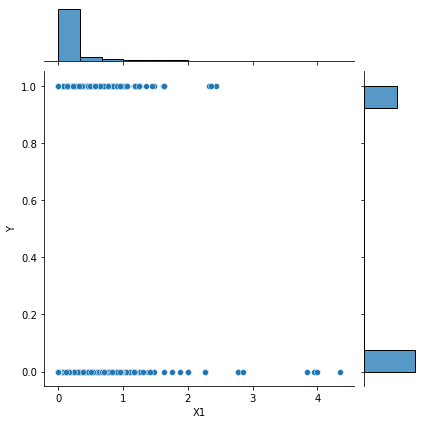

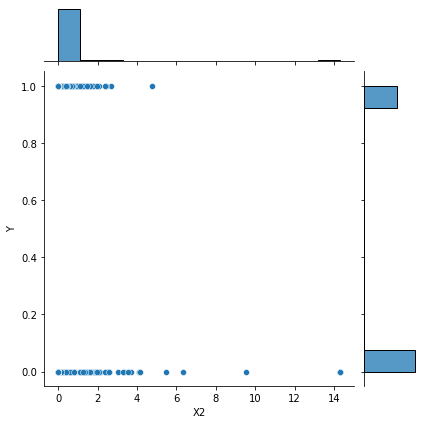

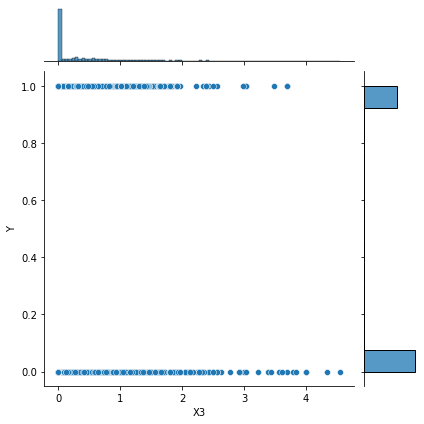

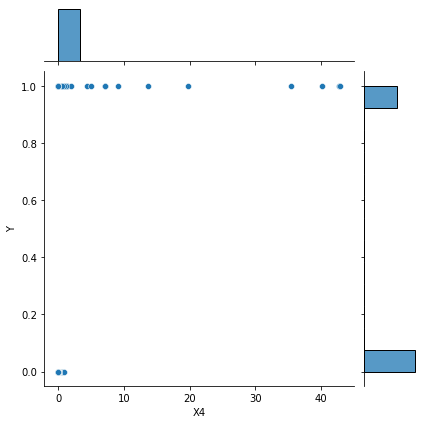

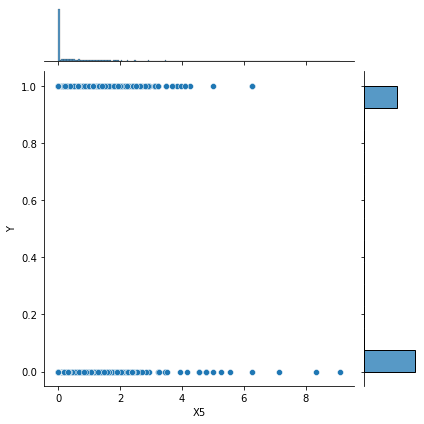

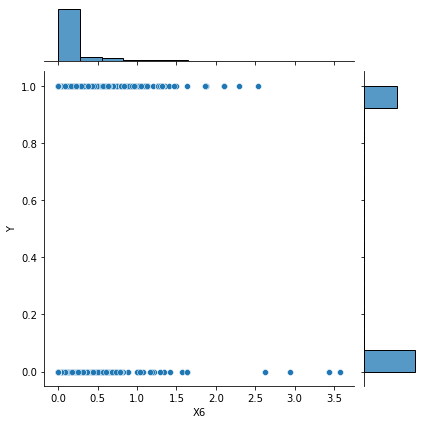

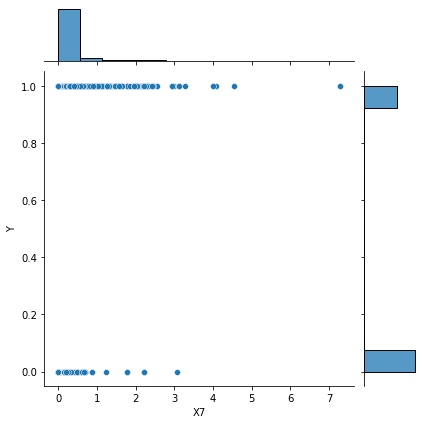

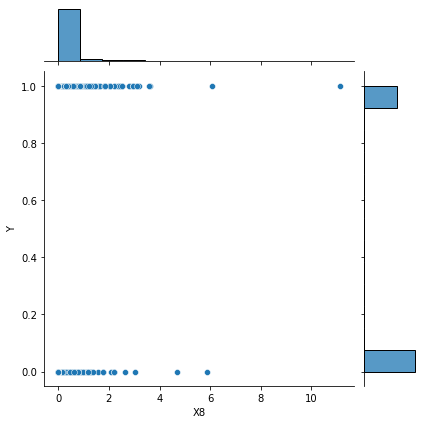

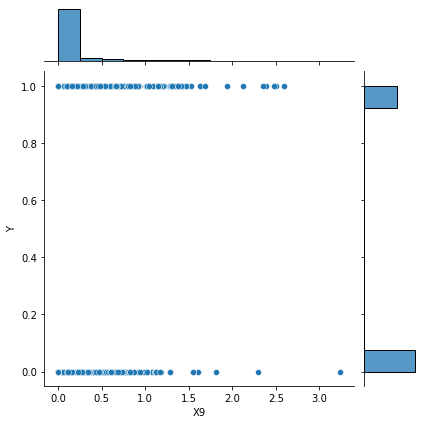

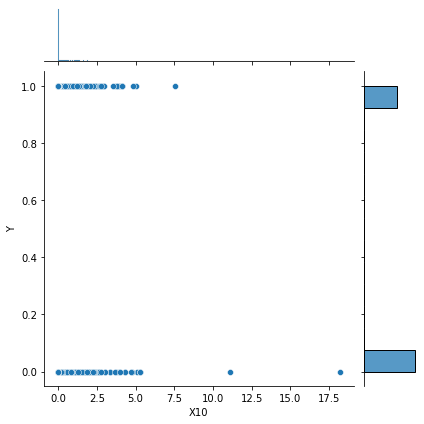

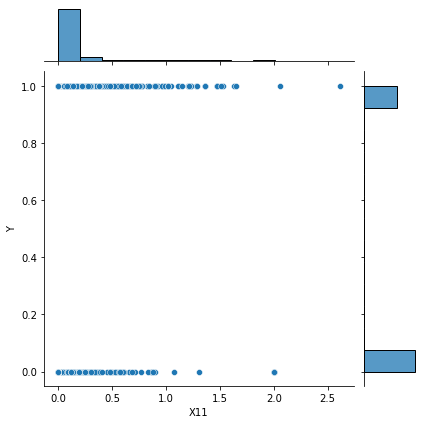

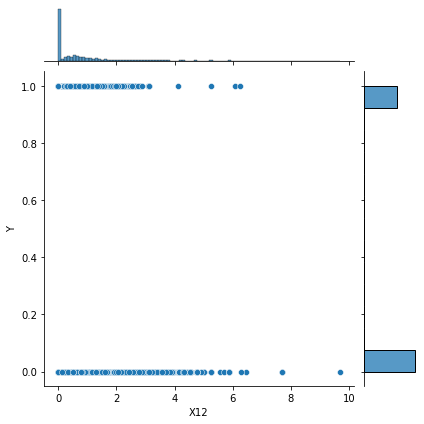

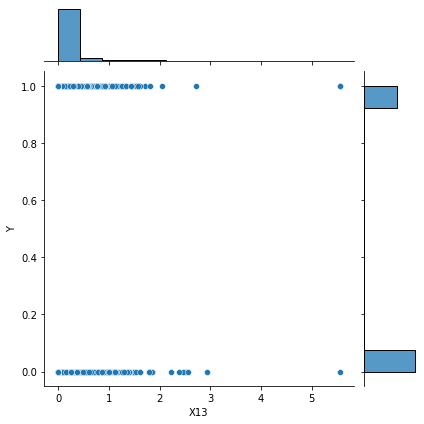

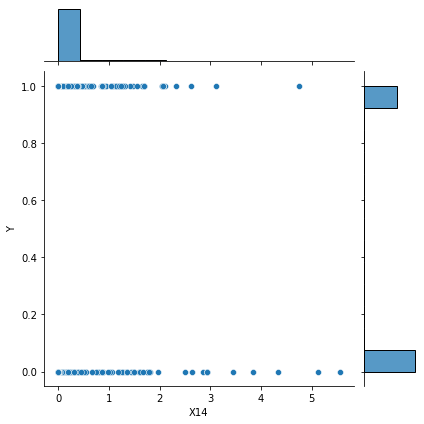

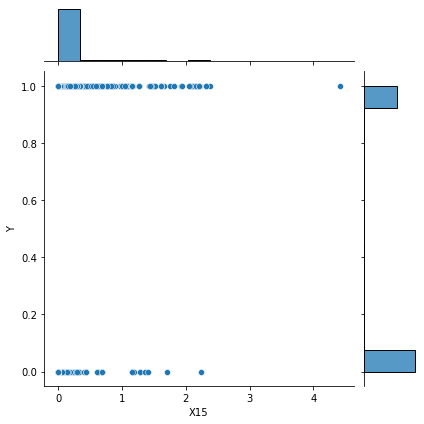

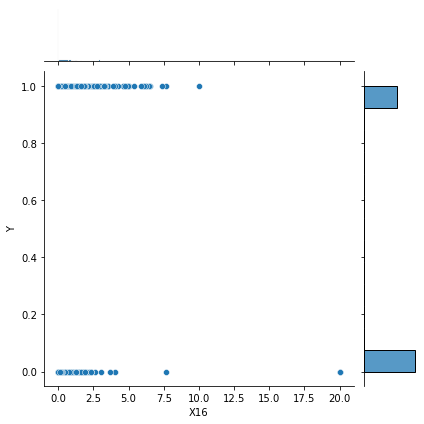

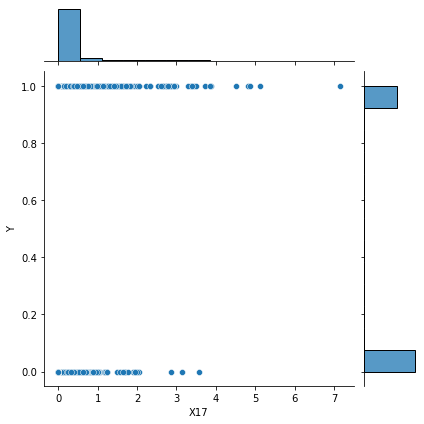

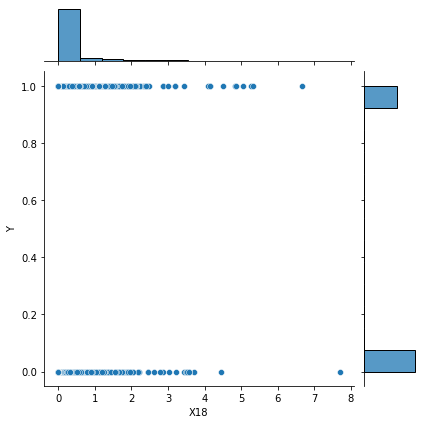

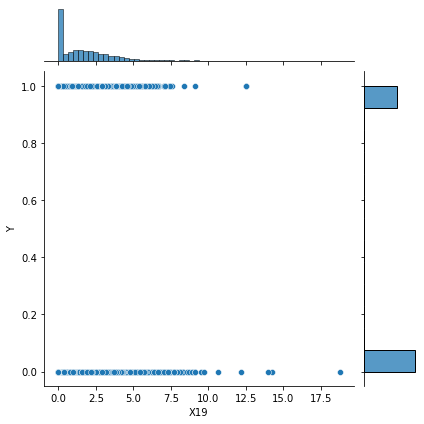

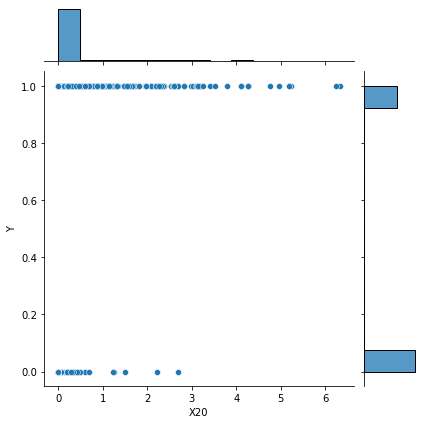

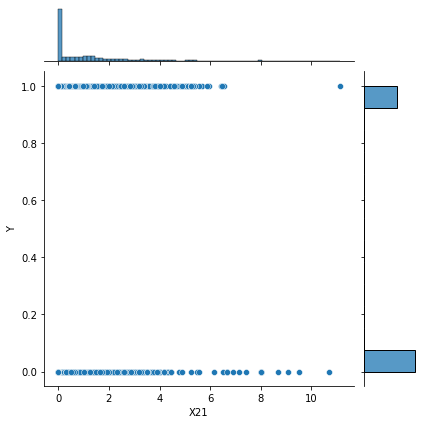

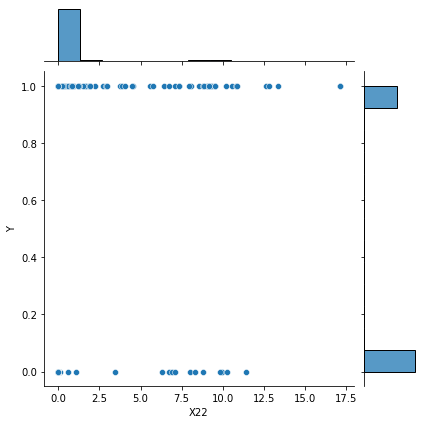

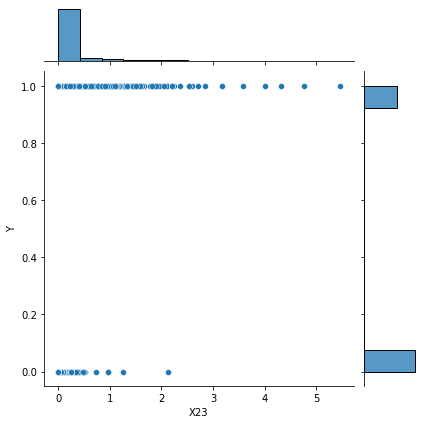

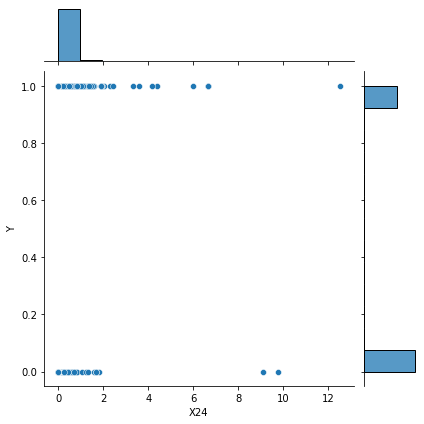

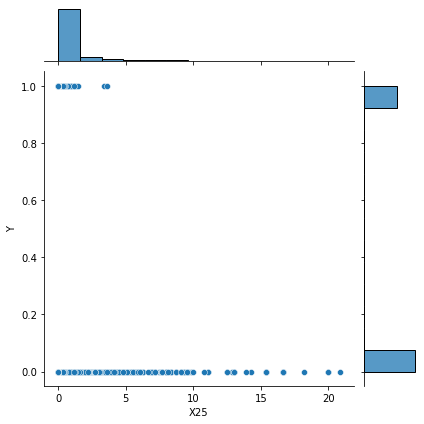

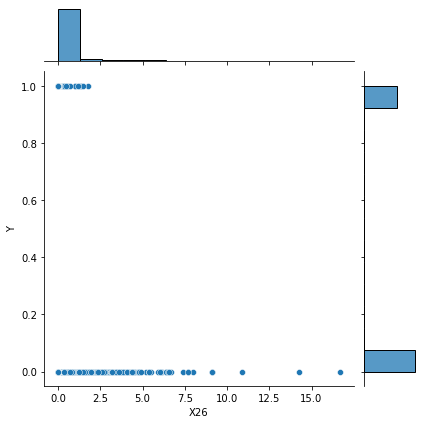

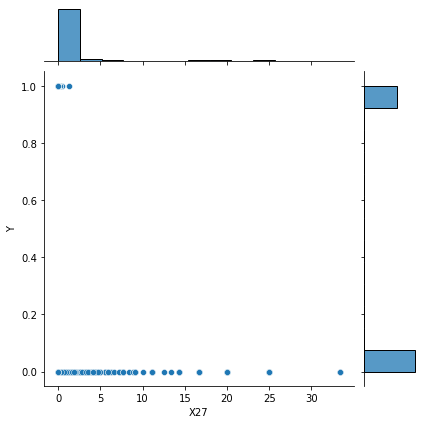

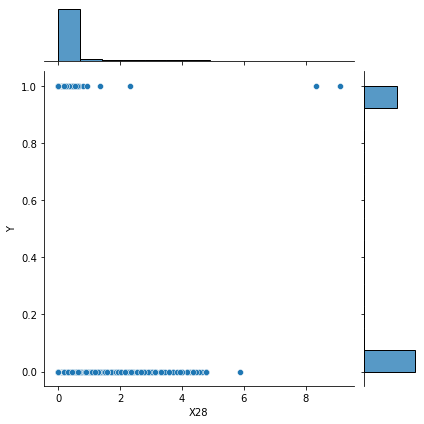

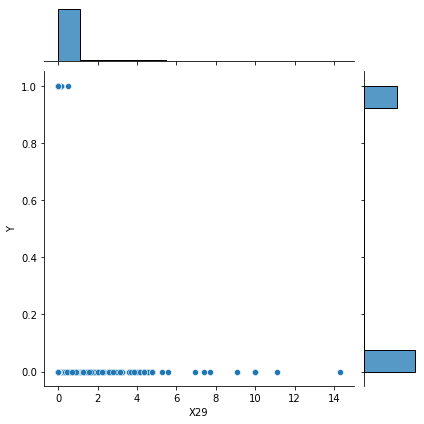

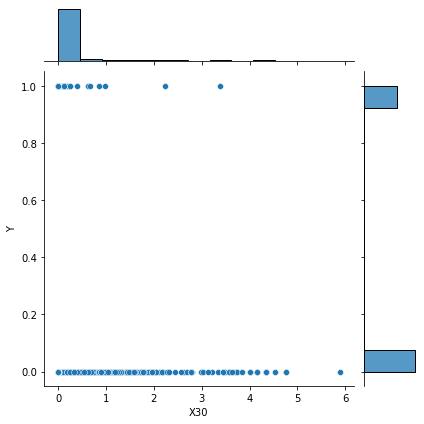

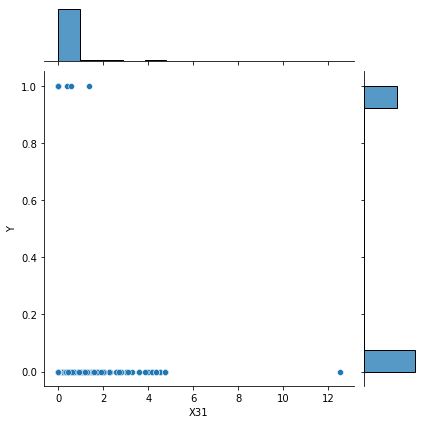

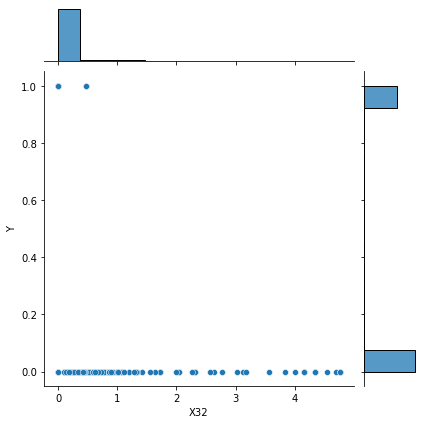

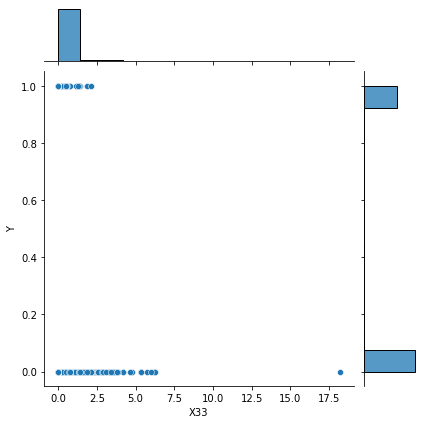

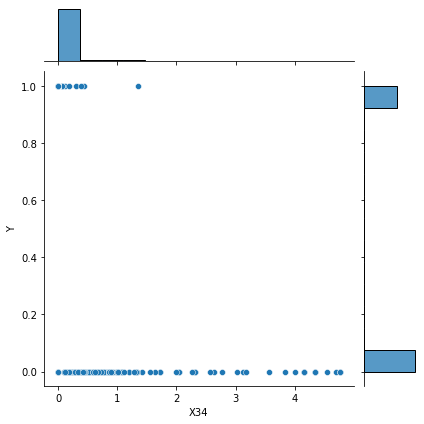

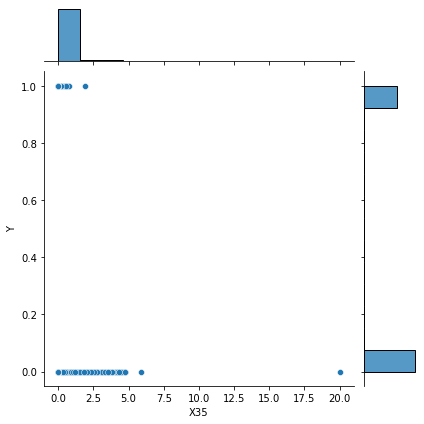

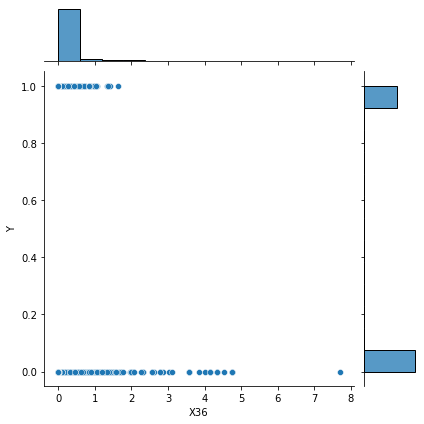

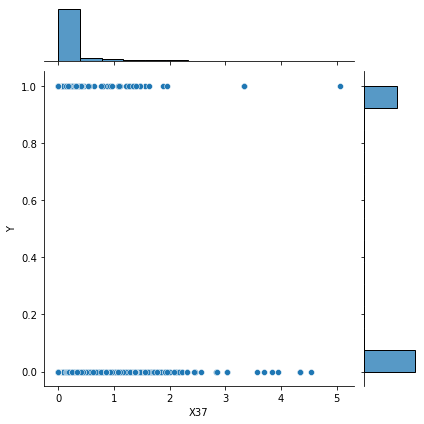

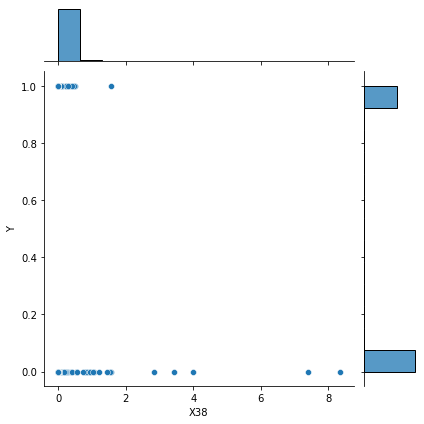

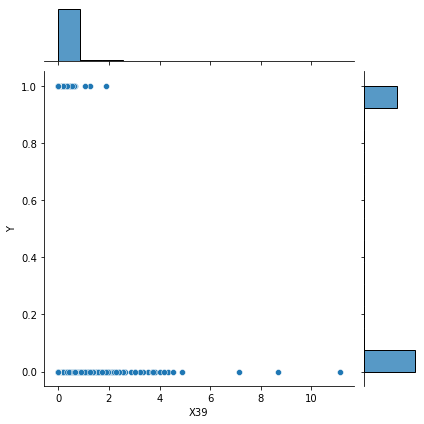

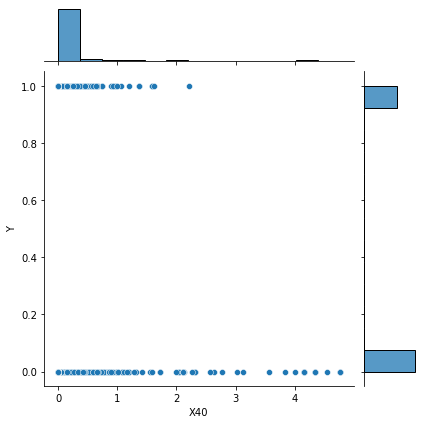

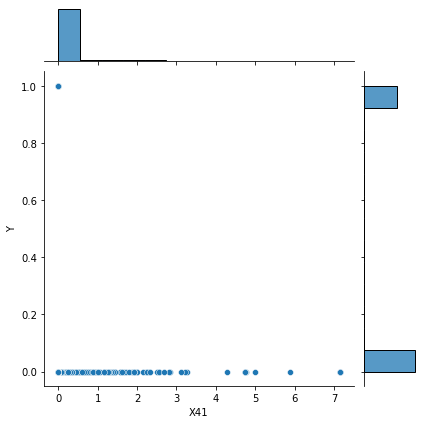

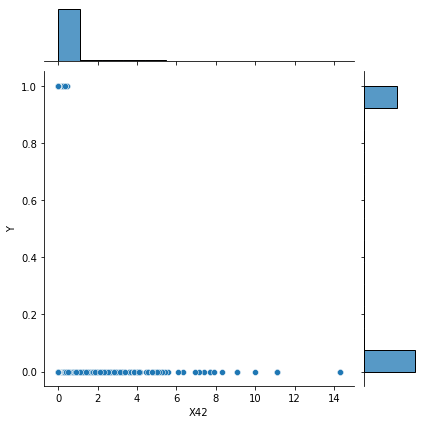

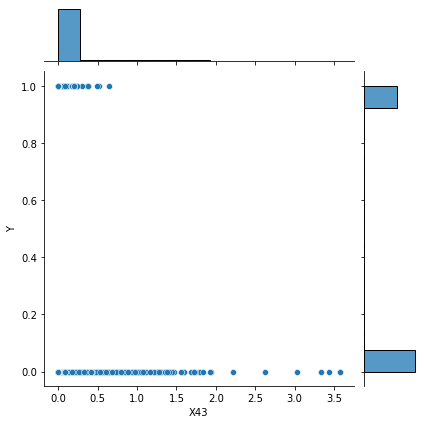

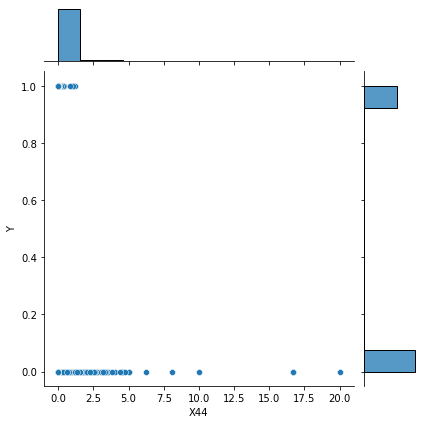

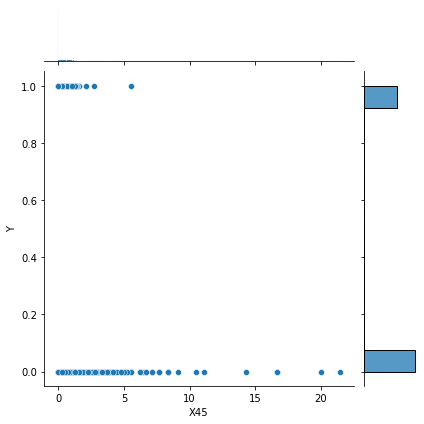

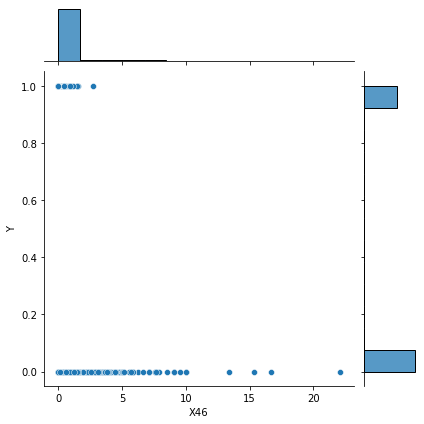

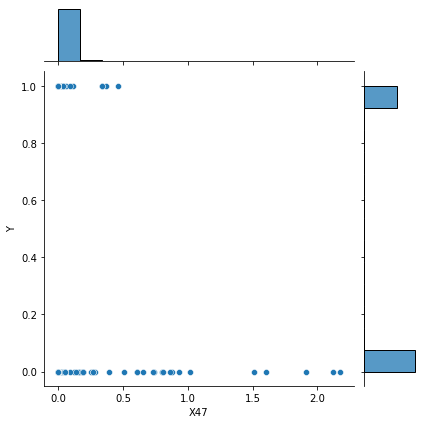

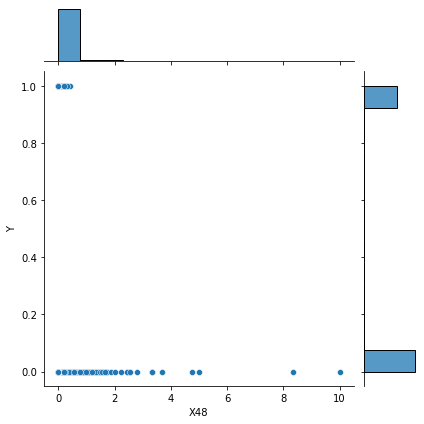

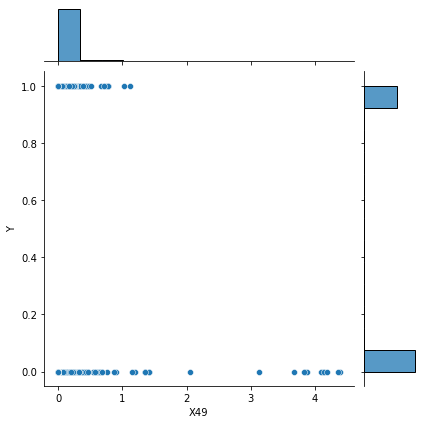

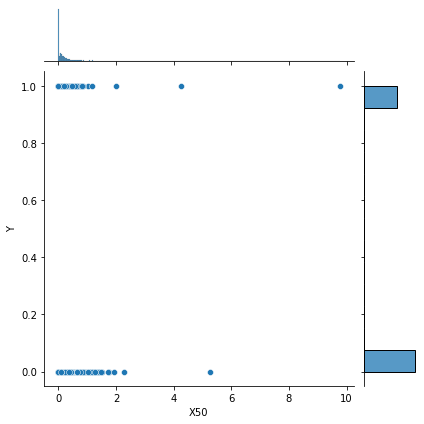

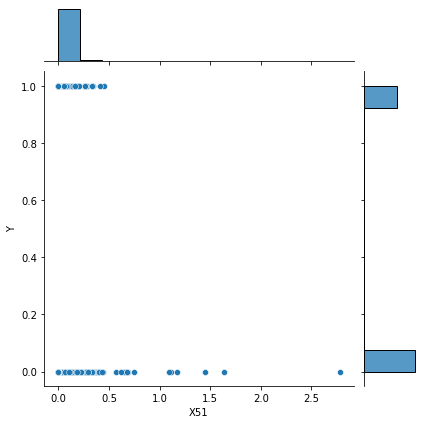

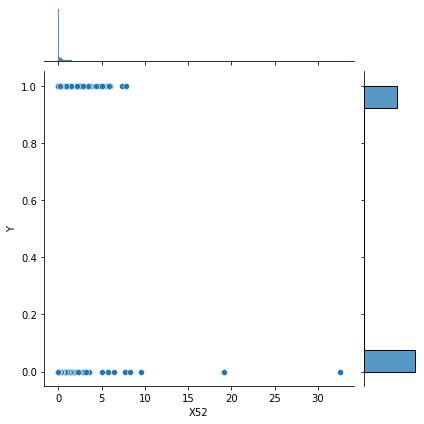

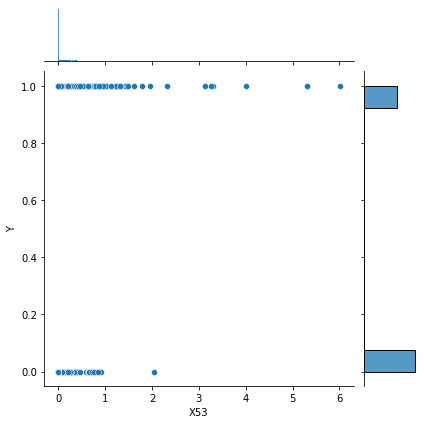

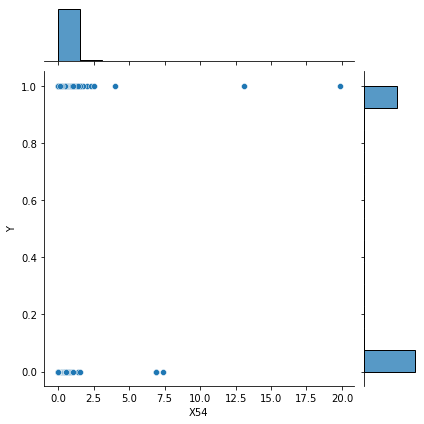

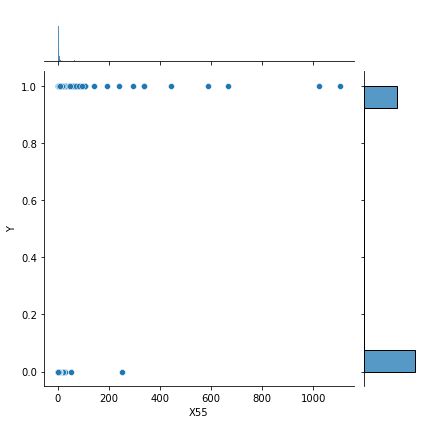

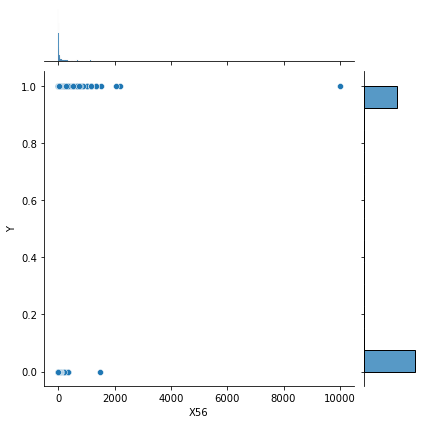

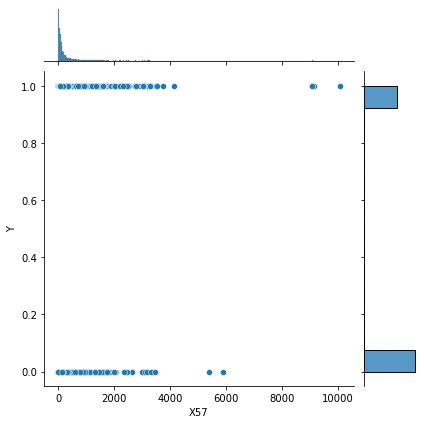

In [5]:
for i in range (0,57):
    sns.jointplot(x=df_train['X'+lst1[i]], y=df_train.Y, data=df_train)
    i=i+1 

In [6]:
for j in range (0,3):
    uv = np.percentile(df_train['X'+lst1[j]],99)
    df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv
    print(uv)
    j=j+1

1.24
2.6545999999999914
2.338199999999997


<ipython-input-6-ea1fc6fd1297>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv
<ipython-input-6-ea1fc6fd1297>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv
<ipython-input-6-ea1fc6fd1297>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv


In [7]:
for j in range (4,57):
    uv = np.percentile(df_train['X'+lst1[j]],99)
    df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv
    print(uv)
    j=j+1

0.0
2.94
1.1990999999999985
1.958199999999997
1.6190999999999987
1.38
2.748199999999997
1.02
4.16
1.4
1.4754999999999927
1.6009999999999855
3.12
2.3290999999999986
2.2272999999999956
7.31
2.5672999999999955
5.26
5.461799999999857
1.6190999999999987
1.31
8.69
4.16
20.0
2.9372999999999956
2.5545999999999913
2.6236999999999897
1.5781999999999972
1.0790999999999986
2.1572999999999958
1.08
2.32
1.6163999999999943
1.8790999999999984
0.25
1.7290999999999985
1.5890999999999986
1.44
3.84
1.1690999999999985
2.0945999999999914
4.76
4.458299999999981
0.05
0.9390999999999985
0.6358199999999997
0.9741999999999971
0.272
2.6355499999999994
0.8934599999999991
0.744249999999989
36.53570999999983
669.0
3032.6399999999994


<ipython-input-7-809dbf241467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv
<ipython-input-7-809dbf241467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv
<ipython-input-7-809dbf241467>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['X'+lst1[j]][(df_train['X'+lst1[j]]>3*uv)] = 3*uv
<ipython-input-7-809db

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

C:\Users\DEVU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y', ylabel='count'>

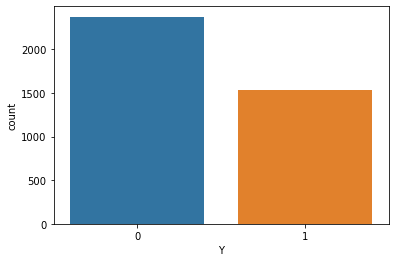

In [9]:
sns.countplot("Y", data =df_train)

In [10]:
df_train.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12.0,0
1,1,0.00,0.56,0.56,0.0,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375.0,1
2,2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5.0,0
3,3,0.64,0.00,0.64,0.0,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122.0,1
4,4,0.58,0.00,0.00,0.0,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207.0,1


NO null value, Outliers treated now data is clean

# Feature selection

In [11]:
from sklearn.feature_selection import mutual_info_classif
m = mutual_info_classif(df_train.drop(['Unnamed: 0', 'Y'], axis=1), df_train['Y'])
n = pd.Series(m, index=df_train.columns[1:-1])
n.sort_values()

X4     0.000000
X48    0.000000
X38    0.001738
X51    0.006695
X47    0.008784
X22    0.012872
X40    0.014118
X39    0.019009
X34    0.019564
X36    0.019636
X32    0.021463
X29    0.022880
X49    0.022947
X35    0.025944
X13    0.026344
X41    0.026962
X46    0.027306
X14    0.028964
X42    0.029008
X33    0.030090
X43    0.032100
X44    0.032997
X31    0.034316
X54    0.035198
X37    0.037879
X1     0.039518
X28    0.045623
X18    0.045939
X12    0.052919
X45    0.053355
X15    0.054044
X9     0.056546
X50    0.057468
X30    0.059581
X10    0.059893
X20    0.063146
X8     0.069384
X11    0.071451
X6     0.071962
X2     0.072555
X3     0.073202
X17    0.080537
X26    0.083138
X27    0.096154
X5     0.098291
X23    0.100778
X24    0.113461
X25    0.128614
X19    0.130936
X16    0.132794
X57    0.133320
X7     0.161144
X21    0.166865
X55    0.180843
X56    0.186584
X53    0.189595
X52    0.204923
dtype: float64

<AxesSubplot:>

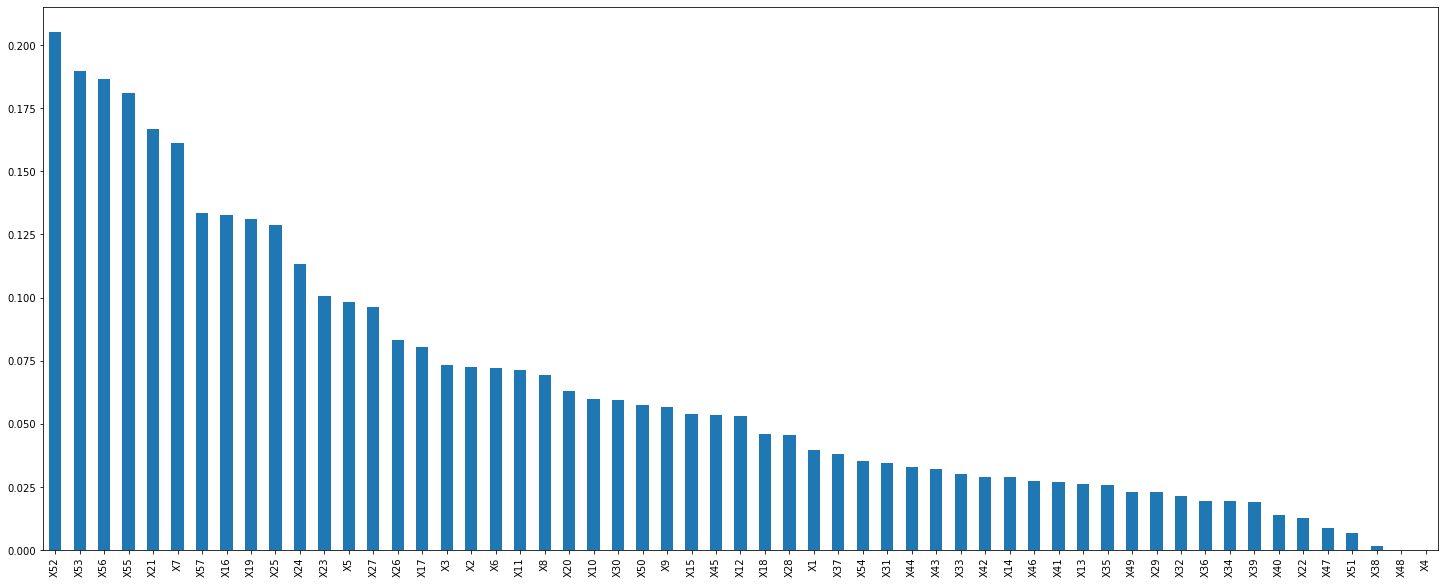

In [12]:
n.sort_values(ascending=False).plot.bar(figsize=(25,10))

In [13]:
from scipy.stats import kendalltau
lst2=[]
for i in range (0,57):
    m,k=kendalltau(df_train['X'+lst1[i]] , df_train.Y)
    lst2.append(k)
    i=i+1
o = pd.Series(lst2, index=df_train.columns[1:-1])
o.sort_values()

X52    6.487463e-302
X53    1.881764e-282
X7     3.753417e-233
X56    6.210811e-231
X21    5.641586e-225
X16    2.753817e-218
X24    1.680337e-204
X55    2.583789e-203
X57    1.050794e-173
X23    5.876433e-162
X5     3.110443e-141
X25    4.352341e-139
X19    3.071140e-120
X11    3.507216e-116
X17    1.605352e-115
X8     3.702241e-113
X27    1.204395e-108
X3     7.557247e-102
X26    4.902335e-101
X20     2.265510e-95
X6      3.617941e-95
X9      6.294359e-84
X10     7.143132e-82
X2      1.114845e-81
X18     7.020657e-78
X15     5.309587e-64
X54     1.631840e-60
X37     2.728062e-58
X1      7.104843e-55
X30     2.006043e-52
X28     1.900689e-45
X29     6.333863e-43
X13     1.880074e-41
X35     7.425234e-41
X31     6.768685e-37
X46     1.097697e-35
X42     2.257051e-34
X32     3.231427e-26
X36     1.245148e-25
X14     2.828450e-24
X34     2.368336e-23
X39     3.380713e-22
X33     1.136120e-21
X12     6.168989e-21
X41     4.933475e-20
X44     1.044736e-18
X48     9.815211e-18
X22     1.084

for feature selection I have used two methods one is mutual information gain (entropy), kendalltau (null hypothisis)
1. for MIG subset taken when when n>.050
2. for Kendalltau when o< e^-30


In [14]:
subset1 = n[n > 0.050].index.to_list()
len(subset1)

29

In [15]:
subset2 = o[o < 2.7182**-30].index.to_list()
len(subset2)

48

# Train-Validation data split

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(df_train.drop(['Unnamed: 0', 'Y'], axis=1), df_train['Y'], test_size=0.2, random_state=0)


# Logistic Regression

In [114]:
Scaling = MinMaxScaler()
Scaling.fit_transform(Xtrain)
Scaling.fit_transform(Xval)

array([[0.00000000e+00, 0.00000000e+00, 5.50660793e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.53898242e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.29781948e-04],
       [3.30645161e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.06609704e-02, 4.13758724e-02, 4.89176556e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.84866878e-02, 1.24626122e-02, 1.02232404e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.10095424e-03, 5.98205384e-03, 1.56096789e-02],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        7.36599890e-03, 1.99401795e-03, 8.79418528e-04]])

In [115]:
from sklearn.linear_model import LogisticRegression
clf_l =LogisticRegression()
clf_l.fit(Xtrain, Ytrain)

C:\Users\DEVU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
clf_l.predict_proba(Xtrain)
Y_t_pred =(clf_l.predict_proba(Xtrain)[:,1]>=0.6).astype(int)
Y_t_pred

array([1, 0, 0, ..., 0, 0, 0])

In [117]:
from sklearn.metrics import precision_score, recall_score
precision_score(Ytrain,Y_t_pred)

0.9145374449339208

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(Ytrain,Y_t_pred))
confusion_matrix(Ytrain,Y_t_pred)

0.9024936061381074


array([[1785,   97],
       [ 208, 1038]], dtype=int64)

In [119]:
clf_l.predict_proba(Xval)
Y_v_pred =(clf_l.predict_proba(Xval)[:,1]>=0.6).astype(int)
Y_v_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [120]:
precision_score(Yval,Y_v_pred)

0.9139784946236559

In [121]:
print(accuracy_score(Yval,Y_v_pred))
confusion_matrix(Yval,Y_v_pred)

0.9271099744245525


array([[470,  24],
       [ 33, 255]], dtype=int64)

On subset 1

In [123]:
clf_lr =LogisticRegression()
clf_lr.fit(Xtrain[subset1], Ytrain)

C:\Users\DEVU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
clf_lr.predict_proba(Xtrain[subset1])
Y_t1_pred =(clf_lr.predict_proba(Xtrain[subset1])[:,1]>=0.6).astype(int)
Y_t1_pred

array([1, 0, 0, ..., 0, 0, 0])

In [125]:
precision_score(Ytrain,Y_t1_pred)

0.9210770659238626

In [126]:
print(accuracy_score(Ytrain,Y_t1_pred))
confusion_matrix(Ytrain,Y_t1_pred)

0.8916240409207161


array([[1797,   85],
       [ 254,  992]], dtype=int64)

In [127]:
clf_lr.predict_proba(Xval[subset1])
Y_v1_pred =(clf_lr.predict_proba(Xval[subset1])[:,1]>=0.6).astype(int)
Y_v1_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [128]:
precision_score(Yval,Y_v1_pred)

0.9069767441860465

In [129]:
print(accuracy_score(Yval,Y_v1_pred))
confusion_matrix(Yval,Y_v1_pred)

0.9002557544757033


array([[470,  24],
       [ 54, 234]], dtype=int64)

On subset 2

In [130]:
clf_lrr =LogisticRegression()
clf_lrr.fit(Xtrain[subset2], Ytrain)
clf_lrr.predict_proba(Xtrain[subset2])
Y_t2_pred =(clf_lrr.predict_proba(Xtrain[subset2])[:,1]>=0.6).astype(int)
print(precision_score(Ytrain,Y_t2_pred))
print(accuracy_score(Ytrain,Y_t2_pred))
clf_lrr.predict_proba(Xval[subset2])
Y_v2_pred =(clf_lrr.predict_proba(Xval[subset2])[:,1]>=0.6).astype(int)
Y_v2_pred
print(precision_score(Yval,Y_v2_pred))
print(accuracy_score(Yval,Y_v2_pred))

0.9273049645390071
0.909846547314578
0.9239543726235742
0.9168797953964194


C:\Users\DEVU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###  Without feature logistic regression perform well with best validation accuracy of 92.07%

# Random forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(Xtrain, Ytrain)
RF.predict(Xtrain)
Ypred =RF.predict(Xtrain)
print(precision_score(Ytrain,Ypred))
print(accuracy_score(Ytrain,Ypred))
RF.predict(Xval)
Y_v_pred =RF.predict(Xval)
print(precision_score(Yval,Y_v_pred))
print(accuracy_score(Yval,Y_v_pred))
confusion_matrix(Yval,Y_v_pred)

0.9991980753809142
0.9996803069053708
0.9324324324324325
0.959079283887468


array([[474,  20],
       [ 12, 276]], dtype=int64)

On subset 1

In [132]:
RF_1 = RandomForestClassifier()
RF_1.fit(Xtrain[subset1], Ytrain)
Ypred1 =RF_1.predict(Xtrain[subset1])
print(precision_score(Ytrain,Ypred1))
print(accuracy_score(Ytrain,Ypred1))
Y_v1_pred =RF_1.predict(Xval[subset1])
print(precision_score(Yval,Y_v1_pred))
print(accuracy_score(Yval,Y_v1_pred))
confusion_matrix(Yval,Y_v1_pred)

1.0
0.9993606138107417
0.9275862068965517
0.948849104859335


array([[473,  21],
       [ 19, 269]], dtype=int64)

On subset 2

In [133]:
RF_2 = RandomForestClassifier()
RF_2.fit(Xtrain[subset2], Ytrain)
Ypred2 =RF_2.predict(Xtrain[subset2])
print(precision_score(Ytrain,Ypred2))
print(accuracy_score(Ytrain,Ypred2))
Y_v2_pred =RF_2.predict(Xval[subset2])
print(precision_score(Yval,Y_v2_pred))
print(accuracy_score(Yval,Y_v2_pred))
confusion_matrix(Yval,Y_v2_pred)

1.0
0.9993606138107417
0.9355932203389831
0.9603580562659847


array([[475,  19],
       [ 12, 276]], dtype=int64)

C:\Users\DEVU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

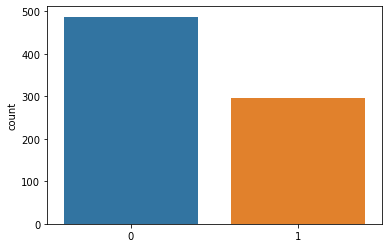

In [134]:
sns.countplot(Y_v2_pred)

### Random forest perform relatively well on subset 2 with validation accuracy of 95.78 than logistic regression model, I will prefer lesser false positive and better accuracy value so i will go with Feature = subset 2, Model = Rf_2 with 19 false positive and 96.035% accuracy

# Script for writing performance model of validation set

In [135]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
def Confusion_matrix(model, X_train, X_test, Y_train, Y_test):
    
    Ytrain_pred = model.predict(X_train)
    Ytest_pred = model.predict(X_test)
    conf_mat_validation = confusion_matrix(Y_test,Ytest_pred)
    conf_mat_training = confusion_matrix(Y_train,Ytrain_pred)
    print("Confusion matrix for training dataset")
    plt.show(sns.heatmap(conf_mat_training, square=True, annot=True, cmap='Blues', fmt='d', cbar=False))
    print('\n')
    print("Confusion matrix for Validation dataset")
    plt.show(sns.heatmap(conf_mat_validation, square=True, annot=True, cmap='Blues', fmt='d', cbar=False))
    

    return

Confusion matrix for training dataset


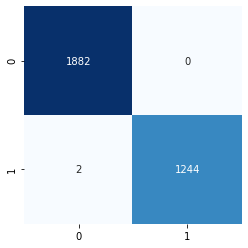



Confusion matrix for Validation dataset


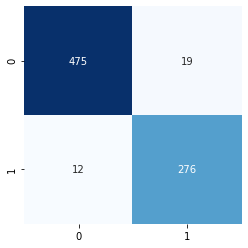

In [136]:
Confusion_matrix(RF_2, Xtrain[subset2], Xval[subset2], Ytrain, Yval)

In [137]:
def Performance(model, X_train, X_test, Y_train, Y_test):
    
    Ytrain_pred = model.predict(X_train)
    Ytest_pred = model.predict(X_test)
    print('Training Accuracy:', accuracy_score(Y_train, Ytrain_pred))
    print('Validation Accuracy:', accuracy_score(Y_test, Ytest_pred))
    print('\n')
    print('Classification Report training: \n', classification_report(Y_train,Ytrain_pred))
    print('\n')
    print('\n')
    print('Classification Report Validation: \n', classification_report(Y_test,Ytest_pred))
    
    return

In [138]:
Performance(RF_2,Xtrain[subset2], Xval[subset2], Ytrain, Yval)

Training Accuracy: 0.9993606138107417
Validation Accuracy: 0.9603580562659847


Classification Report training: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1882
           1       1.00      1.00      1.00      1246

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128





Classification Report Validation: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       494
           1       0.94      0.96      0.95       288

    accuracy                           0.96       782
   macro avg       0.96      0.96      0.96       782
weighted avg       0.96      0.96      0.96       782



# Prediction on test data

In [139]:
df_test.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [140]:
X_test = df_test.drop('Unnamed: 0', axis=1)

In [141]:
Y_test_pred = RF_2.predict(X_test[subset2])
Y_test_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [142]:
Submission = pd.DataFrame({'':df_test['Unnamed: 0'], 'Y':Y_test_pred})

In [145]:
Submission.to_csv('C:/Users/DEVU/Downloads/Arya_DataScientist_Assignment/Data/submission.csv', index=False)